<a href="https://colab.research.google.com/github/DavidCrespo72/AnalisisDatos/blob/main/Taller_Final_AP_Aut_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargamos librerías

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pathlib as pl
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                            precision_score, recall_score, f1_score, roc_curve, auc)


Cargamos dataset

In [13]:
df=pd.read_excel('HISTORICO_SUERTES.xlsx')

Tamaño dataset

In [14]:
df.shape

(21027, 85)

primeras filas

In [15]:
df.head()

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,SAN JUDAS INCAUCA,IP05,82.0,013A,NaN,1.05,66.5,CC01-1940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,JAVA,IP06,31.0,025A,GALPON,4.53,17.0,RB73-2223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Últimas filas

In [16]:
df.tail()

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
21022,202407,80102,LA PAZ,IP01,11.0,051B,LA PAZ,3.00,1.8,CC05-430,...,78.797,16.4,31.089,NaN,467.043,444.382,177.3,1037.8,542.2,1824.6
21023,202407,80102,LA PAZ,IP01,11.0,054C,LA PAZ,1.22,1.8,CC05-430,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21024,202407,80102,LA PAZ,IP01,11.0,054E,LA PAZ,1.85,1.8,CC05-430,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21025,202407,80104,SAMARIA,IP02,11.0,165,PALMIRA,31.42,3.5,CC05-430,...,78.720,17.8,31.040,NaN,467.911,444.839,177.3,1037.8,544.2,1843.9
21026,202407,80124,SANTA LUCIA,IP02,11.0,001,CORINTIAS,2.22,1.1,CC05-430,...,78.687,17.8,30.890,NaN,459.274,444.372,119.8,1041.6,532.5,1881.2


Descripción general de columnas

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.Si

Descripción detallada de columnas del dataset

In [18]:
df.describe()

,Período,Hacienda,Tenencia,Area Neta,Dist Km,Cod.Estado #,F.Siembra,Ult.Riego,Edad Ult Cos,F.Ult.Corte,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
count,21027.000000,21027.000000,21026.000000,21027.000000,21022.000000,21027.000000,21027,8470,21027.00000,21027,...,4530.000000,4530.000000,4530.000000,0.0,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000
mean,202039.708708,80679.334427,46.448730,8.642948,25.311806,4.261806,2015-03-11 18:18:44.839492096,2020-02-16 21:24:26.351829760,13.01111,2020-10-27 09:01:09.339420672,...,80.764679,16.059757,24.556072,NaN,435.119397,438.344500,298.258587,1209.462980,442.941369,1912.479868
min,201701.000000,80100.000000,11.000000,0.004000,1.100000,0.000000,1986-04-30 00:00:00,2016-01-12 00:00:00,1.31000,2017-01-02 00:00:00,...,63.327000,12.500000,22.353000,NaN,352.013000,367.315000,23.100000,23.100000,190.400000,190.400000
25%,201812.000000,80247.000000,31.000000,3.310000,12.000000,1.000000,2013-03-13 00:00:00,2018-03-07 00:00:00,11.93000,2018-12-14 00:00:00,...,80.038000,15.200000,22.946250,NaN,421.344750,426.533250,221.650000,998.900000,416.800000,1729.900000
50%,202010.000000,80453.000000,51.000000,7.000000,21.900000,3.000000,2015-11-10 00:00:00,2019-08-14 00:00:00,12.62000,2020-10-11 00:00:00,...,81.291500,15.700000,23.201500,NaN,436.591000,439.140000,296.900000,1181.150000,440.950000,1885.200000
75%,202209.000000,81104.000000,51.000000,12.075000,32.700000,6.000000,2018-08-07 00:00:00,2022-05-19 00:00:00,13.86000,2022-09-25 00:00:00,...,82.440500,16.800000,25.660000,NaN,449.274000,450.391000,373.300000,1391.850000,465.800000,2057.800000
max,202407.000000,82557.000000,91.000000,65.000000,155.000000,31.000000,2023-09-08 00:00:00,2024-06-27 00:00:00,78.19000,2024-07-10 00:00:00,...,84.816000,19.700000,32.358000,NaN,500.212000,485.672000,618.000000,3783.700000,614.300000,4971.800000
std,216.642895,590.030150,21.513498,7.049533,18.237344,4.111935,NaN,NaN,1.97907,NaN,...,2.752029,1.300131,2.471964,NaN,21.307392,18.582606,102.901635,340.463189,43.680452,307.978328


Revisamos Nulos

In [19]:
df.isnull().sum()

,0
Período,0
Hacienda,0
Nombre,0
Zona,0
Tenencia,1
...,...
Radiacion Solar Ciclo,16497
Precipitacion 0_3,16497
Precipitacion Ciclo,16497
Evaporacion 0-3,16497


% Part. nullos

In [20]:
df.isnull().mean()*100

,0
Período,0.000000
Hacienda,0.000000
Nombre,0.000000
Zona,0.000000
Tenencia,0.004756
...,...
Radiacion Solar Ciclo,78.456271
Precipitacion 0_3,78.456271
Precipitacion Ciclo,78.456271
Evaporacion 0-3,78.456271


Revisar duplicados

In [21]:
df.duplicated().sum()

np.int64(0)

Conteo columba categórica

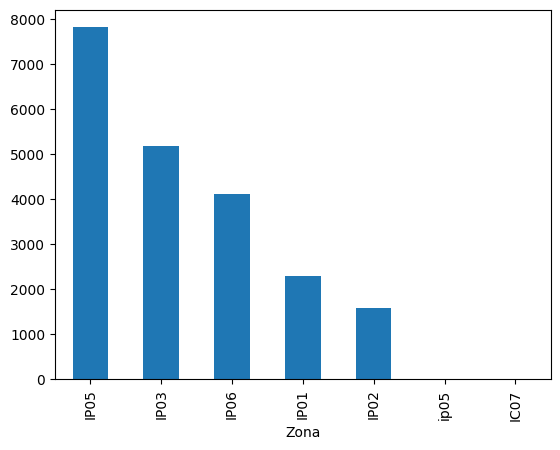

In [22]:
## para categórica

df['Zona'].value_counts().plot(kind='bar')
plt.show()

Ver qué columnas son categóricas

In [23]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Columnas categóricas:", cat_cols.tolist())

Columnas categóricas: ['Nombre', 'Zona', 'Suerte', 'Suelo', 'Variedad', 'Cod.Estado', 'D.S.', 'Cultivo', 'Producto', 'Tipo Quema', 'T.Corte', 'Cerca de', 'Cosechó', 'Codigo Estacion']


Sacamos una base solo con categóricas

In [24]:
df_Cat=df[['TCH','Nombre', 'Zona', 'Suerte', 'Suelo', 'Variedad', 'Cod.Estado', 'D.S.', 'Cultivo', 'Producto', 'Tipo Quema', 'T.Corte', 'Cerca de', 'Cosechó', 'Codigo Estacion']]
df_Cat.head()

,TCH,Nombre,Zona,Suerte,Suelo,Variedad,Cod.Estado,D.S.,Cultivo,Producto,Tipo Quema,T.Corte,Cerca de,Cosechó,Codigo Estacion
0,121.198333,LA CONCHA,IP02,002A,CANTARINA,CC85-92,Corte 5,NaN,Normal,BONUS 250 EC REGULADOR FISIOLÓGICO,VERDE,MECANIZADO,El Cerrito,AI08,NaN
1,93.793103,UKRANIA INCAUCA,IP05,039B,NaN,CC85-92,Corte 5,NaN,Normal,NaN,Q.ACCIDENTAL,MANUAL,Candelaria,AI08,NaN
2,174.347087,EL AMPARO SAA,IP05,007,CORINTIAS,CC01-1228,Corte 4,1.65,Normal,BONUS 250 EC REGULADOR FISIOLÓGICO,VERDE,MECANIZADO,Palmira,AI08,NaN
3,136.790476,SAN JUDAS INCAUCA,IP05,013A,NaN,CC01-1940,Corte 2,NaN,Normal,NaN,Q.ACCIDENTAL,MANUAL,Corinto,AI08,NaN
4,113.068432,JAVA,IP06,025A,GALPON,RB73-2223,Corte 3,1.65,Normal,NaN,Q.ACCIDENTAL,MANUAL,Guacari,AI08,NaN


Vamos a revisar significancia de categóricas

In [25]:
import pandas as pd
import numpy as np
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_v(df_Cat['TCH'], df['Zona'])

np.float64(0.0467073751739401)

In [26]:
import pandas as pd
import numpy as np
import scipy.stats as ss

# Función de Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Variable objetivo
target = "TCH"

# Seleccionar categóricas (object o category)
cat_cols = df_Cat.select_dtypes(include=['object','category']).columns

# Calcular Cramer's V contra cada categórica
resultados = {}
for col in cat_cols:
    if col != target:  # evitar comparar target consigo mismo
        resultados[col] = cramers_v(df[col], df[target])

# Pasar a DataFrame ordenado
cramer_df = pd.DataFrame.from_dict(resultados, orient='index', columns=['Cramers_V'])
cramer_df = cramer_df.sort_values(by='Cramers_V', ascending=False)

print(cramer_df)

                 Cramers_V
Cultivo           0.050160
Zona              0.046707
D.S.              0.039182
Suelo             0.035211
Producto          0.031530
Cod.Estado        0.031363
Codigo Estacion   0.025767
T.Corte           0.022168
Nombre            0.000000
Suerte            0.000000
Variedad          0.000000
Tipo Quema        0.000000
Cerca de          0.000000
Cosechó           0.000000


Separar columnas númericas para correr correlaciones

In [27]:
df_numericas = df.select_dtypes(include=[np.number])
df_numericas.head()

,Período,Hacienda,Tenencia,Area Neta,Dist Km,Cod.Estado #,Edad Ult Cos,Destino 1=Semilla,Cod. T.Cultivo,Dosis Madurante,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,51.0,6.00,4.3,5,12.81,0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,81.0,1.45,NaN,5,11.14,0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,31.0,8.24,23.0,4,12.32,0,1.0,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,82.0,1.05,66.5,2,9.79,0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,31.0,4.53,17.0,3,11.53,0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Correlaciones

In [28]:
### Ver si lo quitamos

corr=df_numericas.corr().sort_values('TCH', ascending=False)
print (corr)

                            Período  Hacienda  Tenencia  Area Neta   Dist Km  \
TCH                       -0.122134 -0.051714 -0.021055   0.093021 -0.048510   
TAH                       -0.148777 -0.011808  0.024973   0.140966 -0.013920   
TCHM                      -0.054296 -0.072896 -0.069913   0.087121 -0.079327   
KATRHM                    -0.096214 -0.054111 -0.040488   0.121152 -0.056160   
TAHM                      -0.093161 -0.020695  0.004759   0.151875 -0.030986   
...                             ...       ...       ...        ...       ...   
%ATR                      -0.099064  0.038233  0.053667   0.067557  0.043439   
%Sac.Caña                 -0.120753  0.050982  0.038158   0.113064  0.048021   
Cod.Estado #              -0.000865  0.065617  0.193415   0.035206 -0.007177   
Fert.Nitrogen.                  NaN       NaN       NaN        NaN       NaN   
Sum Oscilacion Temp Ciclo       NaN       NaN       NaN        NaN       NaN   

                           Cod.Estado #

In [29]:
## ver si lo quitamos

# Aplanar matriz y ordenar
corr_ord = corr.unstack().sort_values(ascending=False)

# Quitar la diagonal (correlación = 1.0) y duplicados
corr_filtrada = corr_ord[corr_ord < 1].drop_duplicates()

# Mostrar las 20 más fuertes
print(corr_filtrada.head(20))

Ton.Azucar            TonUltCorte              0.987930
Brix                  Pureza                   0.978632
%Sac.Caña             Rdto                     0.970430
Evaporacion Ciclo     Edad.Precosecha          0.968729
%Sac.Muestreadora     Brix                     0.957215
Area Neta             TonUltCorte              0.948529
Ton.Azucar            Area Neta                0.947346
TAHM                  KATRHM                   0.942482
TCHM                  KATRHM                   0.898913
TAH                   TAHM                     0.881677
                      TCH                      0.866165
Rdto                  %Sac.Muestreadora        0.857887
Luvias 9 -FC          Lluvias Ciclo            0.851217
Lluvias seis a nueve  Lluvias Ciclo            0.847246
Pureza                %Sac.Muestreadora        0.831700
Evaporacion Ciclo     Edad Ult Cos             0.830807
TCHM                  TCH                      0.829980
Lluvias tres a seis   Lluvias Ciclo            0

In [30]:
# Calcular correlaciones con churn y ordenarlas
df_numericas = df.corr(numeric_only=True)['TCH'].sort_values(ascending=False)

# Mostrar resultado
print(df_numericas)

TCH                          1.000000
TAH                          0.866165
TCHM                         0.829980
KATRHM                       0.767925
TAHM                         0.737953
                               ...   
%ATR                        -0.138399
%Sac.Caña                   -0.168060
Cod.Estado #                -0.225865
Fert.Nitrogen.                    NaN
Sum Oscilacion Temp Ciclo         NaN
Name: TCH, Length: 67, dtype: float64


In [31]:
corr_df = df_numericas.reset_index()
corr_df.columns = ['Variable', 'Correlacion_con_TCH']
corr_df

,Variable,Correlacion_con_TCH
0,TCH,1.000000
1,TAH,0.866165
2,TCHM,0.829980
3,KATRHM,0.767925
4,TAHM,0.737953
...,...,...
62,%ATR,-0.138399
63,%Sac.Caña,-0.168060
64,Cod.Estado #,-0.225865
65,Fert.Nitrogen.,NaN


In [32]:
print(df_numericas.head(20))

TCH                      1.000000
TAH                      0.866165
TCHM                     0.829980
KATRHM                   0.767925
TAHM                     0.737953
TonUltCorte              0.320696
Edad Ult Cos             0.298166
Ton.Azucar               0.295671
Evaporacion Ciclo        0.260934
Evaporacion 0-3          0.185401
Edad.Precosecha          0.168624
Radicion Solar 0-3       0.164893
Luvias 9 -FC             0.156767
Radiacion Solar Ciclo    0.113209
%Infest.Diatrea          0.102551
DDUlt.Riego              0.093181
Area Neta                0.093021
M3 Riego                 0.084436
Lluvias Ciclo            0.084137
MEZ                      0.078172
Name: TCH, dtype: float64


Separar de mi dataset mis variables de interés para medición de TCH

In [33]:
df_i=df[['TCH','TAH','TCHM','KATRHM','TAHM','TonUltCorte','Edad Ult Cos','Ton.Azucar','Evaporacion Ciclo','Evaporacion 0-3','Edad.Precosecha','Radicion Solar 0-3','Luvias 9 -FC']]
df_i.head()

,TCH,TAH,TCHM,KATRHM,TAHM,TonUltCorte,Edad Ult Cos,Ton.Azucar,Evaporacion Ciclo,Evaporacion 0-3,Edad.Precosecha,Radicion Solar 0-3,Luvias 9 -FC
0,121.198333,14.341666,9.461228,1434.823641,1.119567,727.19,12.81,86.050,NaN,NaN,NaN,NaN,482.0
1,93.793103,10.157241,8.419488,1182.180399,0.911781,136.00,11.14,14.728,NaN,NaN,NaN,NaN,0.0
2,174.347087,17.629611,14.151549,1857.192723,1.430974,1436.62,12.32,145.268,NaN,NaN,12.02,NaN,457.0
3,136.790476,12.873333,13.972469,1744.043640,1.314947,143.63,9.79,13.517,NaN,NaN,NaN,NaN,0.0
4,113.068432,9.383002,9.806455,1137.843039,0.813790,512.20,11.53,42.505,NaN,NaN,NaN,NaN,284.0


In [34]:
df_i

,TCH,TAH,TCHM,KATRHM,TAHM,TonUltCorte,Edad Ult Cos,Ton.Azucar,Evaporacion Ciclo,Evaporacion 0-3,Edad.Precosecha,Radicion Solar 0-3,Luvias 9 -FC
0,121.198333,14.341666,9.461228,1434.823641,1.119567,727.190,12.81,86.050,NaN,NaN,NaN,NaN,482.0
1,93.793103,10.157241,8.419488,1182.180399,0.911781,136.000,11.14,14.728,NaN,NaN,NaN,NaN,0.0
2,174.347087,17.629611,14.151549,1857.192723,1.430974,1436.620,12.32,145.268,NaN,NaN,12.02,NaN,457.0
3,136.790476,12.873333,13.972469,1744.043640,1.314947,143.630,9.79,13.517,NaN,NaN,NaN,NaN,0.0
4,113.068432,9.383002,9.806455,1137.843039,0.813790,512.200,11.53,42.505,NaN,NaN,NaN,NaN,284.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21022,172.446666,NaN,14.827744,NaN,NaN,517.340,11.63,NaN,1824.6,542.2,NaN,467.043,560.0
21023,108.573770,NaN,9.131519,NaN,NaN,132.460,11.89,NaN,1867.2,536.4,NaN,461.663,560.0
21024,145.808108,NaN,12.263087,NaN,NaN,269.745,11.89,NaN,1867.2,536.4,NaN,461.663,560.0
21025,143.638287,NaN,12.276776,NaN,NaN,4513.115,11.70,NaN,1843.9,544.2,NaN,467.911,394.0


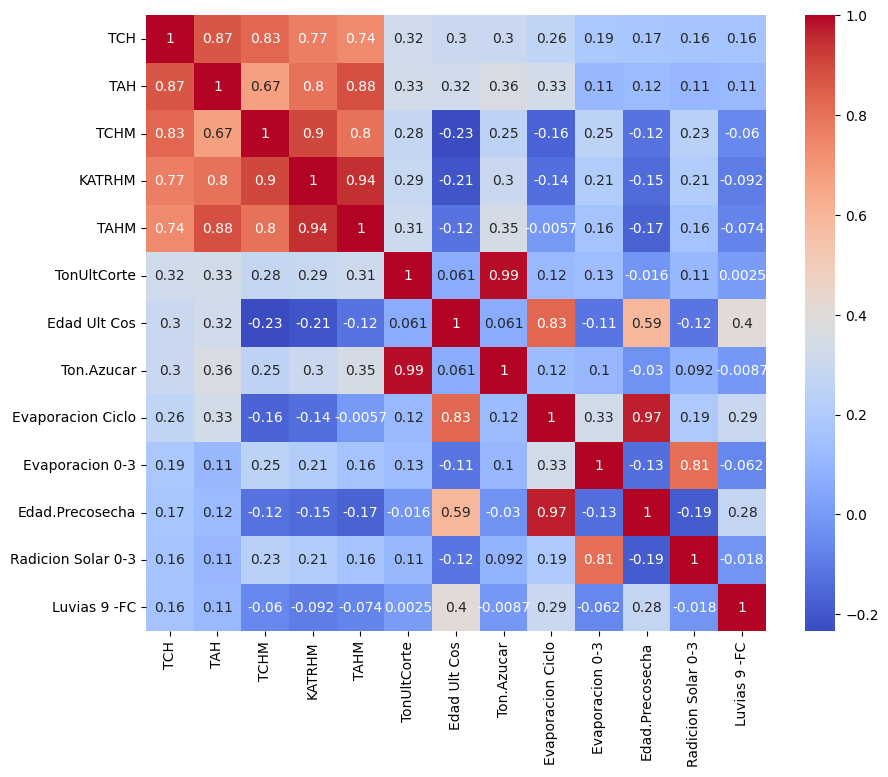

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_i.corr(), annot=True, cmap='coolwarm')
plt.show()

Valido nulos en mi dataset de interés

In [36]:
df_i.isnull().sum()

,0
TCH,0
TAH,241
TCHM,0
KATRHM,522
TAHM,241
TonUltCorte,0
Edad Ult Cos,0
Ton.Azucar,241
Evaporacion Ciclo,16497
Evaporacion 0-3,16497


Outliers

In [37]:
df_i.describe()

,TCH,TAH,TCHM,KATRHM,TAHM,TonUltCorte,Edad Ult Cos,Ton.Azucar,Evaporacion Ciclo,Evaporacion 0-3,Edad.Precosecha,Radicion Solar 0-3,Luvias 9 -FC
count,21027.000000,20786.000000,21027.000000,20505.000000,20786.000000,21027.000000,21027.00000,20786.000000,4530.000000,4530.000000,8919.000000,4530.000000,21027.000000
mean,129.608509,13.888988,10.050417,1372.453892,1.071335,1141.737477,13.01111,124.249246,1912.479868,442.941369,12.360247,435.119397,165.606631
std,32.846029,3.805457,2.502829,341.453701,0.284829,1018.073158,1.97907,111.842688,307.978328,43.680452,1.420836,21.307392,233.114931
min,1.573653,0.000000,0.138403,49.089172,0.000000,0.420000,1.31000,0.000000,190.400000,190.400000,0.000000,352.013000,0.000000
25%,108.691426,11.690238,8.463211,1165.486757,0.909263,398.442500,11.93000,42.282500,1729.900000,416.800000,11.530000,421.344750,0.000000
50%,129.479600,14.014765,10.089412,1383.492899,1.087821,870.030000,12.62000,93.736500,1885.200000,440.950000,12.090000,436.591000,61.000000
75%,150.407607,16.297881,11.649057,1586.077694,1.253172,1591.720000,13.86000,173.921750,2057.800000,465.800000,12.940000,449.274000,263.000000
max,401.045947,72.167500,60.095588,15466.532614,5.191906,13586.140000,78.19000,1312.973000,4971.800000,614.300000,23.520000,500.212000,2752.000000


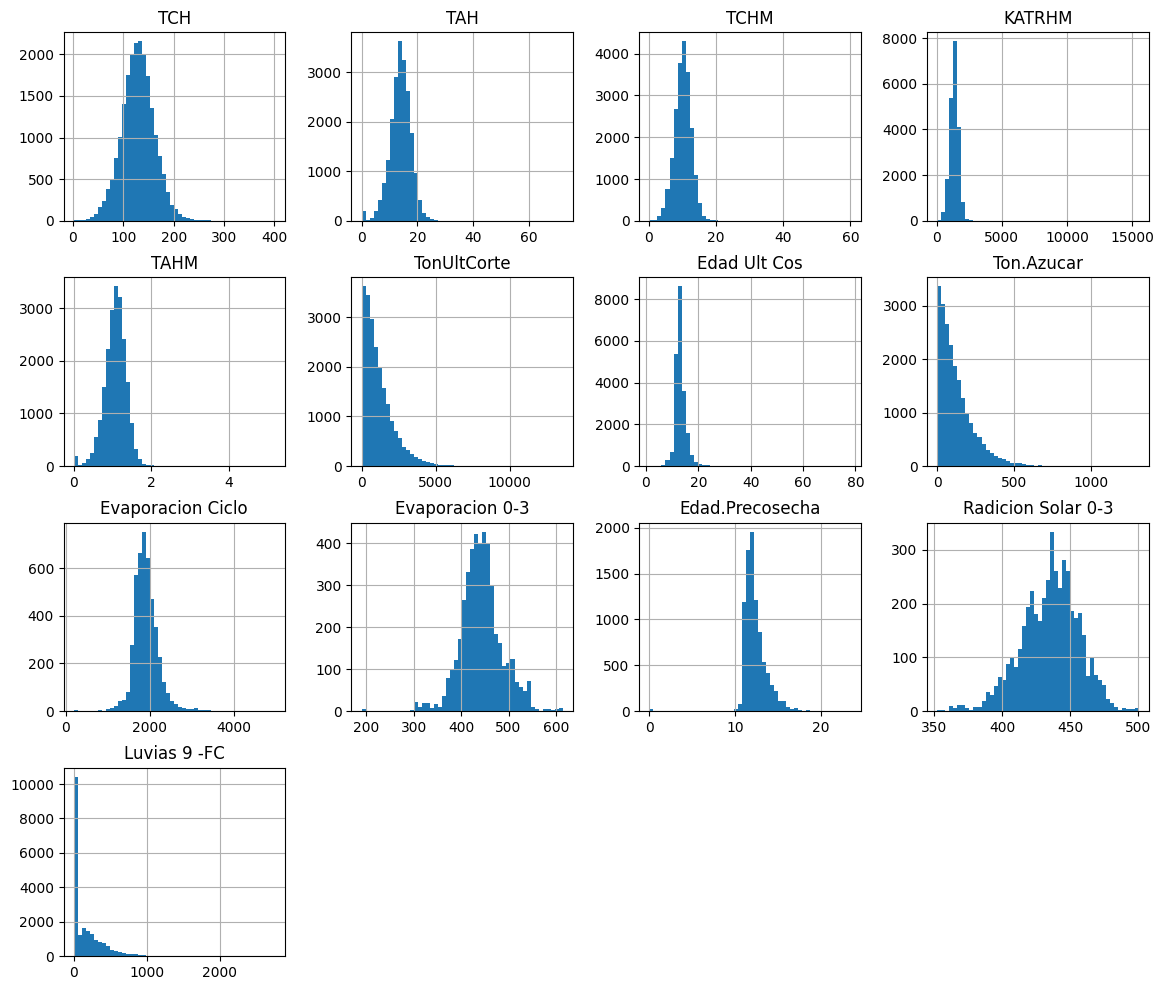

In [38]:
df_i.hist(bins=50,figsize=(14,12))
plt.show()

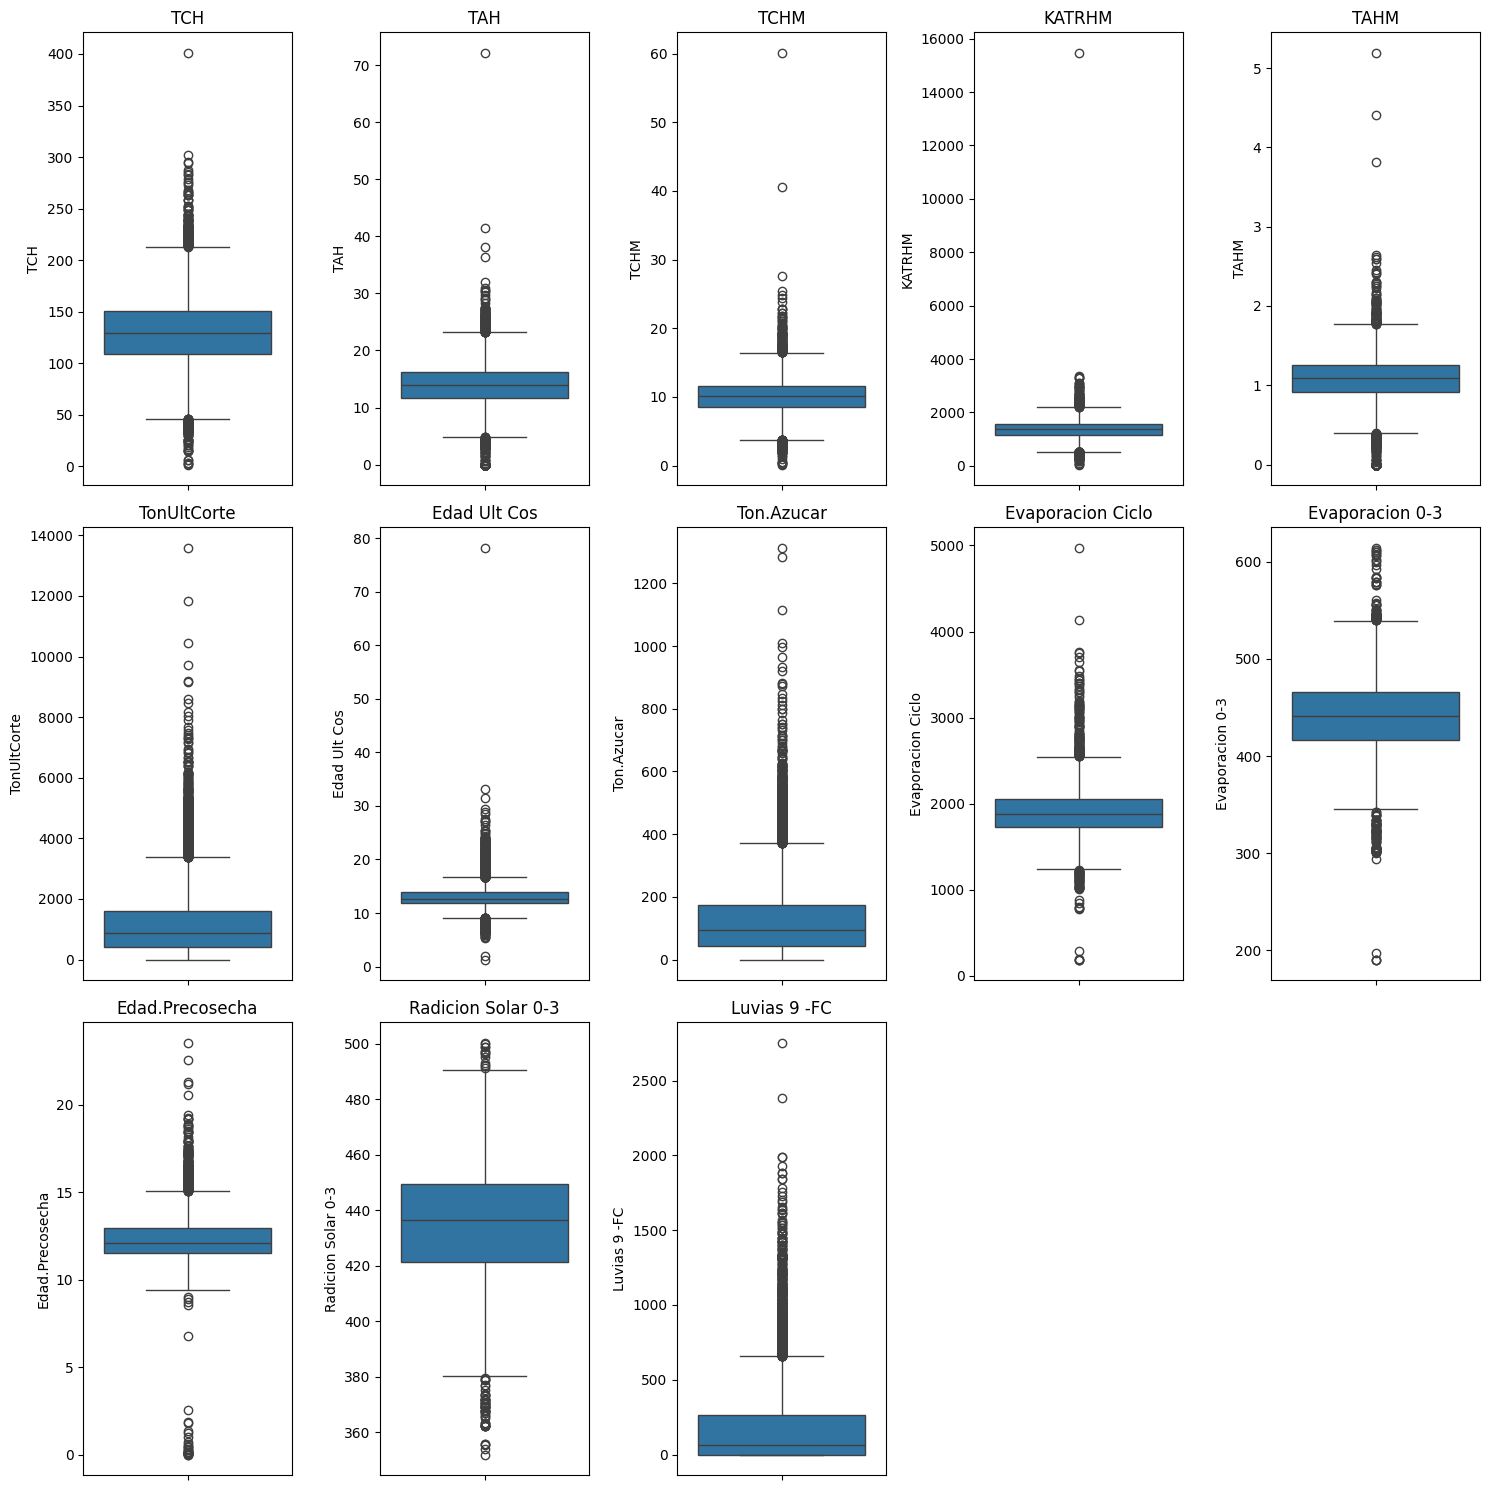

In [39]:
import math

num_cols = df_i.select_dtypes(include=['number']).columns
n = len(num_cols)

# Definir grid
ncols = 5   # número de boxplots por fila
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5*nrows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=df_i[col], ax=axes[i])
    axes[i].set_title(col)

# Quitar subplots vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

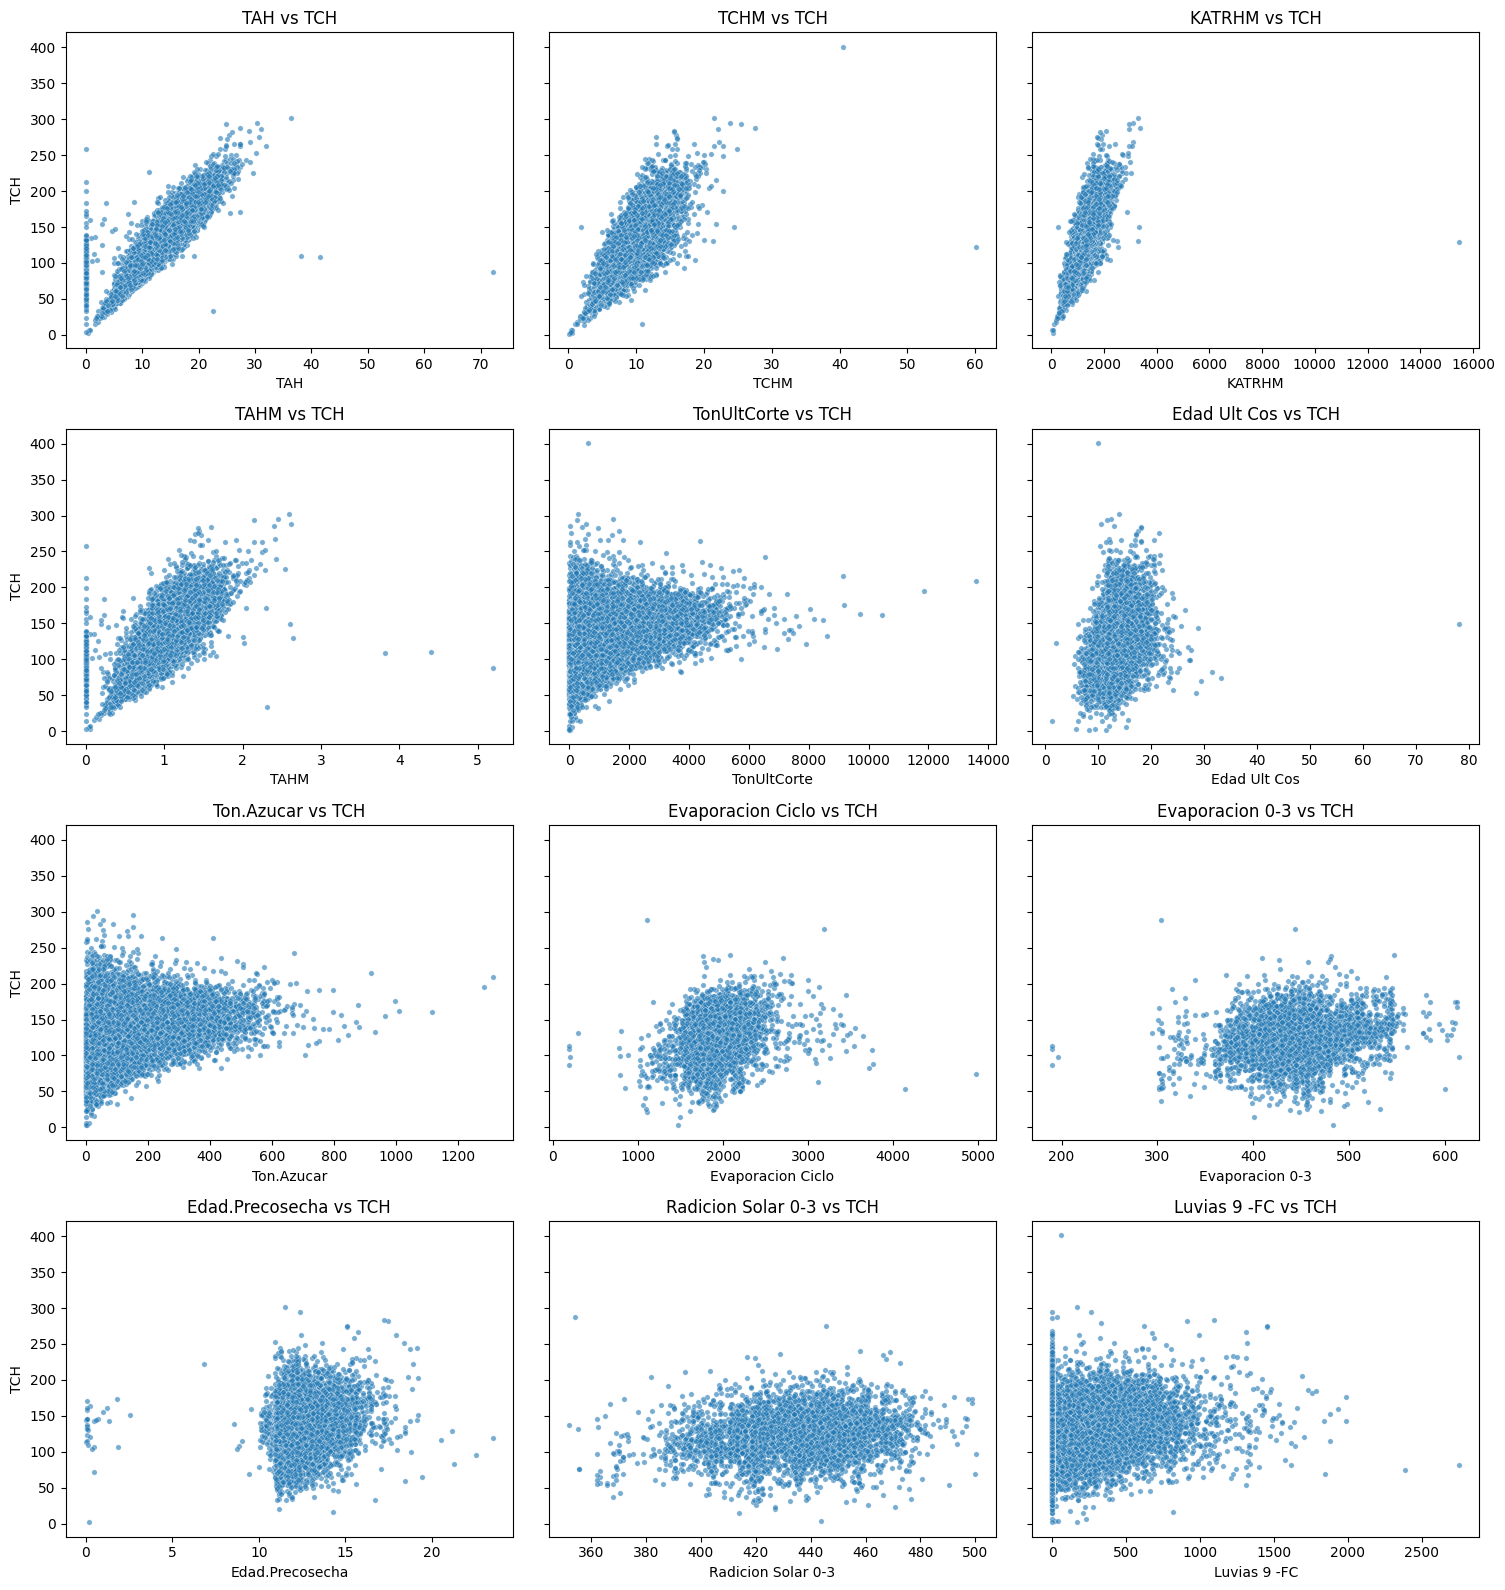

In [40]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

y = "TCH"  # tu variable objetivo en eje Y

# Tomar todas las numéricas excepto Y
x_cols = df_i.select_dtypes(include=['number']).columns.drop(y)

n = len(x_cols)
ncols = 3   # número de gráficos por fila
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows), sharey=True)
axes = axes.flatten()

for i, col in enumerate(x_cols):
    sns.scatterplot(data=df_i, x=col, y=y, ax=axes[i], s=15, alpha=0.6)
    axes[i].set_title(f"{col} vs {y}")

# Quitar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

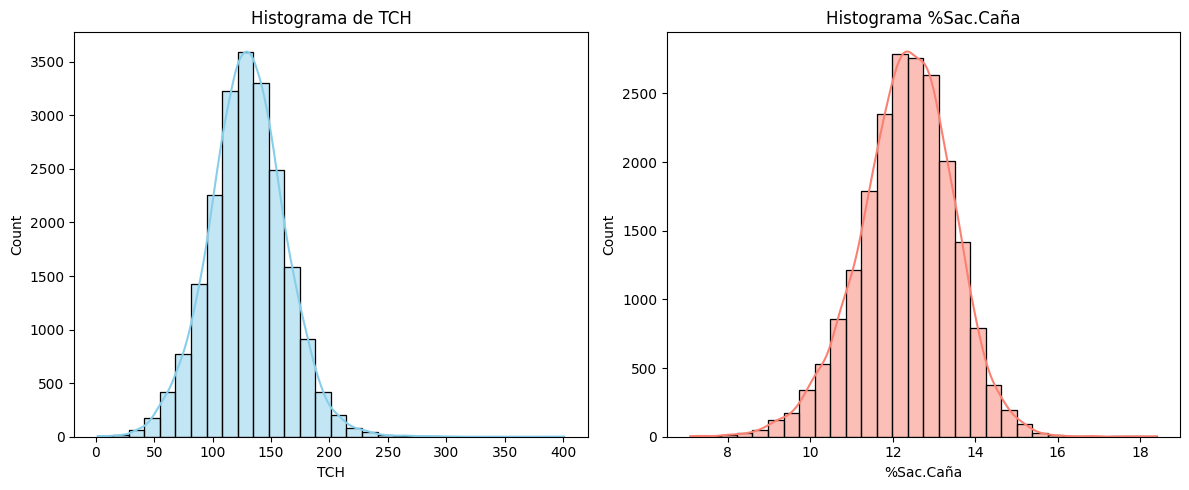

In [41]:
# Crear lienzo con 2 subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma 1
sns.histplot(df['TCH'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histograma de TCH')

# Histograma 2
sns.histplot(df['%Sac.Caña'], bins=30, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Histograma %Sac.Caña')

plt.tight_layout()
plt.show()

In [42]:
df_i

,TCH,TAH,TCHM,KATRHM,TAHM,TonUltCorte,Edad Ult Cos,Ton.Azucar,Evaporacion Ciclo,Evaporacion 0-3,Edad.Precosecha,Radicion Solar 0-3,Luvias 9 -FC
0,121.198333,14.341666,9.461228,1434.823641,1.119567,727.190,12.81,86.050,NaN,NaN,NaN,NaN,482.0
1,93.793103,10.157241,8.419488,1182.180399,0.911781,136.000,11.14,14.728,NaN,NaN,NaN,NaN,0.0
2,174.347087,17.629611,14.151549,1857.192723,1.430974,1436.620,12.32,145.268,NaN,NaN,12.02,NaN,457.0
3,136.790476,12.873333,13.972469,1744.043640,1.314947,143.630,9.79,13.517,NaN,NaN,NaN,NaN,0.0
4,113.068432,9.383002,9.806455,1137.843039,0.813790,512.200,11.53,42.505,NaN,NaN,NaN,NaN,284.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21022,172.446666,NaN,14.827744,NaN,NaN,517.340,11.63,NaN,1824.6,542.2,NaN,467.043,560.0
21023,108.573770,NaN,9.131519,NaN,NaN,132.460,11.89,NaN,1867.2,536.4,NaN,461.663,560.0
21024,145.808108,NaN,12.263087,NaN,NaN,269.745,11.89,NaN,1867.2,536.4,NaN,461.663,560.0
21025,143.638287,NaN,12.276776,NaN,NaN,4513.115,11.70,NaN,1843.9,544.2,NaN,467.911,394.0


In [43]:
x = df['Edad Ult Cos']
y = df['TCH']
x = sm.add_constant(x)
model_1 = sm.OLS(y, x).fit()
print(model_1.summary())

model_1.summary()


                            OLS Regression Results                            
Dep. Variable:                    TCH   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2052.
Date:                Mon, 08 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:22:50   Log-Likelihood:            -1.0228e+05
No. Observations:               21027   AIC:                         2.046e+05
Df Residuals:                   21025   BIC:                         2.046e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           65.2221      1.438     45.361   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TCH   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2052.
Date:                Mon, 08 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:22:50   Log-Likelihood:            -1.0228e+05
No. Observations:               21027   AIC:                         2.046e+05
Df Residuals:                   21025   BIC:                         2.046e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           65.2221      1.438     45.361      0.000      62.404      68.040
Edad Ult Cos     4.9486      0.109     45.294      0.000       4.734       5.163
==============================================================================
Omnibus:                      624.850   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1643.776
Skew:                          -0.043   Prob(JB):                         0.00
Kurtosis:                       4.367   Cond. No.                         88.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
x = df_i['Edad Ult Cos']
y = df_i['TCH']
x = sm.add_constant(x)
model_1 = sm.OLS(y, x).fit()
print(model_1.summary())

model_1.summary()

                            OLS Regression Results                            
Dep. Variable:                    TCH   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2052.
Date:                Mon, 08 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:22:50   Log-Likelihood:            -1.0228e+05
No. Observations:               21027   AIC:                         2.046e+05
Df Residuals:                   21025   BIC:                         2.046e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           65.2221      1.438     45.361   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TCH   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2052.
Date:                Mon, 08 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:22:50   Log-Likelihood:            -1.0228e+05
No. Observations:               21027   AIC:                         2.046e+05
Df Residuals:                   21025   BIC:                         2.046e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           65.2221      1.438     45.361      0.000      62.404      68.040
Edad Ult Cos     4.9486      0.109     45.294      0.000       4.734       5.163
==============================================================================
Omnibus:                      624.850   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1643.776
Skew:                          -0.043   Prob(JB):                         0.00
Kurtosis:                       4.367   Cond. No.                         88.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
##Eliminar outliers de Edad ult cos

col = 'Edad Ult Cos'

low = df_i[col].quantile(0.01)   # percentil 1%
high = df_i[col].quantile(0.99)  # percentil 99%

df_filtrado = df_i[(df_i[col] >= low) & (df[col] <= high)]

In [46]:
df_filtrado.describe()

,TCH,TAH,TCHM,KATRHM,TAHM,TonUltCorte,Edad Ult Cos,Ton.Azucar,Evaporacion Ciclo,Evaporacion 0-3,Edad.Precosecha,Radicion Solar 0-3,Luvias 9 -FC
count,20612.000000,20405.000000,20612.000000,20169.000000,20405.000000,20612.000000,20612.000000,20405.000000,4424.000000,4424.000000,8873.000000,4424.000000,20612.000000
mean,129.919134,13.950465,10.069432,1377.036130,1.077726,1152.542840,12.978712,125.446759,1900.036460,442.902758,12.344064,435.039766,162.809268
std,32.376991,3.713740,2.437938,337.274096,0.277812,1016.693845,1.650456,111.641538,256.667759,43.604967,1.382441,21.269063,221.628860
min,1.573653,0.000000,0.138403,49.089172,0.000000,0.420000,8.380000,0.000000,190.400000,190.400000,0.000000,352.013000,0.000000
25%,109.202751,11.775942,8.505301,1170.657117,0.917225,409.428750,11.960000,43.698000,1731.975000,416.400000,11.530000,421.205000,0.000000
50%,129.711568,14.044485,10.105372,1386.458204,1.092449,881.145000,12.620000,95.063000,1882.500000,440.700000,12.090000,436.508000,65.000000
75%,150.463501,16.309351,11.652090,1587.659004,1.255660,1604.709750,13.830000,175.133000,2049.025000,465.800000,12.940000,449.234000,262.000000
max,401.045947,72.167500,40.550651,15466.532614,5.191906,13586.140000,19.250000,1312.973000,2906.300000,614.300000,18.790000,500.212000,1932.000000


In [47]:
x = df_filtrado['Edad Ult Cos']
y = df_filtrado['TCH']
x = sm.add_constant(x)
model_1 = sm.OLS(y, x).fit()
print(model_1.summary())

model_1.summary()


                            OLS Regression Results                            
Dep. Variable:                    TCH   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     2114.
Date:                Mon, 08 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:22:50   Log-Likelihood:                -99918.
No. Observations:               20612   AIC:                         1.998e+05
Df Residuals:                   20610   BIC:                         1.999e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           52.2643      1.703     30.697   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TCH   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     2114.
Date:                Mon, 08 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:22:50   Log-Likelihood:                -99918.
No. Observations:               20612   AIC:                         1.998e+05
Df Residuals:                   20610   BIC:                         1.999e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           52.2643      1.703     30.697      0.000      48.927      55.602
Edad Ult Cos     5.9832      0.130     45.978      0.000       5.728       6.238
==============================================================================
Omnibus:                      381.566   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              801.257
Skew:                           0.019   Prob(JB):                    1.02e-174
Kurtosis:                       3.965   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
df_TAH_nulos = df_i.dropna(subset=['TAH'])

In [53]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Supongamos que tu variable independiente es 'Semanas_mad'
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_TAH_nulos[['TAH']])  # estandarizada
y = df_TAH_nulos['TCH']

# Ahora puedes usar X_scaled en tu modelo
import statsmodels.api as sm
X_scaled = sm.add_constant(X_scaled)
modelo = sm.OLS(y, X_scaled).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    TCH   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 6.243e+04
Date:                Mon, 08 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:25:47   Log-Likelihood:                -87537.
No. Observations:               20786   AIC:                         1.751e+05
Df Residuals:                   20784   BIC:                         1.751e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        129.7271      0.113   1145.958      0.0

In [54]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Supongamos que tu variable independiente es 'Semanas_mad'
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_filtrado[['Edad Ult Cos']])  # estandarizada
y = df_filtrado['TCH']

# Ahora puedes usar X_scaled en tu modelo
import statsmodels.api as sm
X_scaled = sm.add_constant(X_scaled)
modelo = sm.OLS(y, X_scaled).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    TCH   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     2114.
Date:                Mon, 08 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:28:58   Log-Likelihood:                -99918.
No. Observations:               20612   AIC:                         1.998e+05
Df Residuals:                   20610   BIC:                         1.999e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        129.9191      0.215    604.907      0.0

In [55]:
df_sin_nulos = df.dropna(subset=['Semanas mad.'])

In [56]:
df_sin_nulos

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,201704,80328,LA ROCHELA,IP03,51.0,003A,JUANCHITO,6.50,32.2,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,201701,80194,EL LIMONAR TESORITO,IP06,28.0,002A,CORINTIAS,15.22,10.5,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,201701,80203,EL AMPARO SAA,IP05,31.0,003B,CORINTIAS,6.62,23.0,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21005,202407,81384,SAN JUANITO DUALCA,IP03,51.0,001,VILLA,3.25,46.6,CC01-1940,...,80.273,18.0,32.194,NaN,470.909,464.080,246.6,938.0,528.7,1514.4
21006,202407,82515,EL FARO EMPRESA,IP05,11.0,001,JUANCHITO,20.18,34.7,CC05-430,...,74.109,18.0,31.255,NaN,483.999,465.596,138.3,880.2,550.0,2019.0
21007,202407,80121,PIEDECHINCHE,IP01,11.0,042B,CERRITO-NIMA,0.36,9.5,CC09-535,...,78.689,17.8,30.939,NaN,461.663,443.690,168.7,1035.6,536.4,1843.6
21008,202407,80174,MEDIACANOA,IP03,31.0,004A,CHAMBURO,8.46,43.5,CC05-430,...,80.095,17.7,30.720,NaN,434.173,458.339,148.0,1082.1,477.6,1915.7


In [57]:
df_sin_nulos['Semanas mad.']=pd.to_numeric(df['Semanas mad.'],errors='coerce')

/tmp/ipython-input-1830718310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['Semanas mad.']=pd.to_numeric(df['Semanas mad.'],errors='coerce')


In [58]:
df_sin_nulos['Semanas mad.'] = pd.to_numeric(df_sin_nulos['Semanas mad.'], errors='coerce')
df_sin_nulos['TCH'] = pd.to_numeric(df_sin_nulos['TCH'], errors='coerce')

/tmp/ipython-input-966417817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['Semanas mad.'] = pd.to_numeric(df_sin_nulos['Semanas mad.'], errors='coerce')
/tmp/ipython-input-966417817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['TCH'] = pd.to_numeric(df_sin_nulos['TCH'], errors='coerce')


In [59]:
df_modelo = df_sin_nulos[['Semanas mad.', 'TCH']].replace([np.inf, -np.inf], np.nan).dropna()

In [60]:
df_renom=df_modelo.rename(columns={'Semanas mad.':'Semanas mad'})

In [61]:
x = df_renom[['Semanas mad']]
y = df_renom['TCH']
x = sm.add_constant(x)
model_1 = sm.OLS(y, x).fit()
print(model_1.summary())

model_1.summary()

                            OLS Regression Results                            
Dep. Variable:                    TCH   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.787
Date:                Mon, 08 Sep 2025   Prob (F-statistic):            0.00527
Time:                        00:29:12   Log-Likelihood:                -54070.
No. Observations:               11252   AIC:                         1.081e+05
Df Residuals:                   11250   BIC:                         1.082e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         127.4634      0.554    230.180      

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TCH   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.787
Date:                Mon, 08 Sep 2025   Prob (F-statistic):            0.00527
Time:                        00:29:12   Log-Likelihood:                -54070.
No. Observations:               11252   AIC:                         1.081e+05
Df Residuals:                   11250   BIC:                         1.082e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         127.4634      0.554    230.180      0.000     126.378     128.549
Semanas mad     0.1393      0.050      2.790      0.005       0.041       0.237
==============================================================================
Omnibus:                       55.357   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.545
Skew:                          -0.006   Prob(JB):                     8.79e-18
Kurtosis:                       3.409   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""